
# GTC ML Project 1 — Hotel Booking Cancellation (Data Cleaning & Preprocessing)

This notebook implements the full workflow requested by the GTC Team: EDA, a data quality report, data cleaning, feature engineering, leakage prevention, and a final ML-ready preprocessing pipeline for a hotel booking cancellation prediction problem.

**Dataset expected**: `hotel_bookings.csv` (as provided from PMS). Place it in the same directory as this notebook or update the `DATA_PATH` below.


In [91]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin

In [92]:
df = pd.read_csv("hotel_bookings.csv")  

In [93]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [94]:
df.shape

(119390, 32)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [96]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## Phase 1 — EDA & Data Quality Report

In [97]:
print(df.isna().sum())
print(df.isna().mean() * 100)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

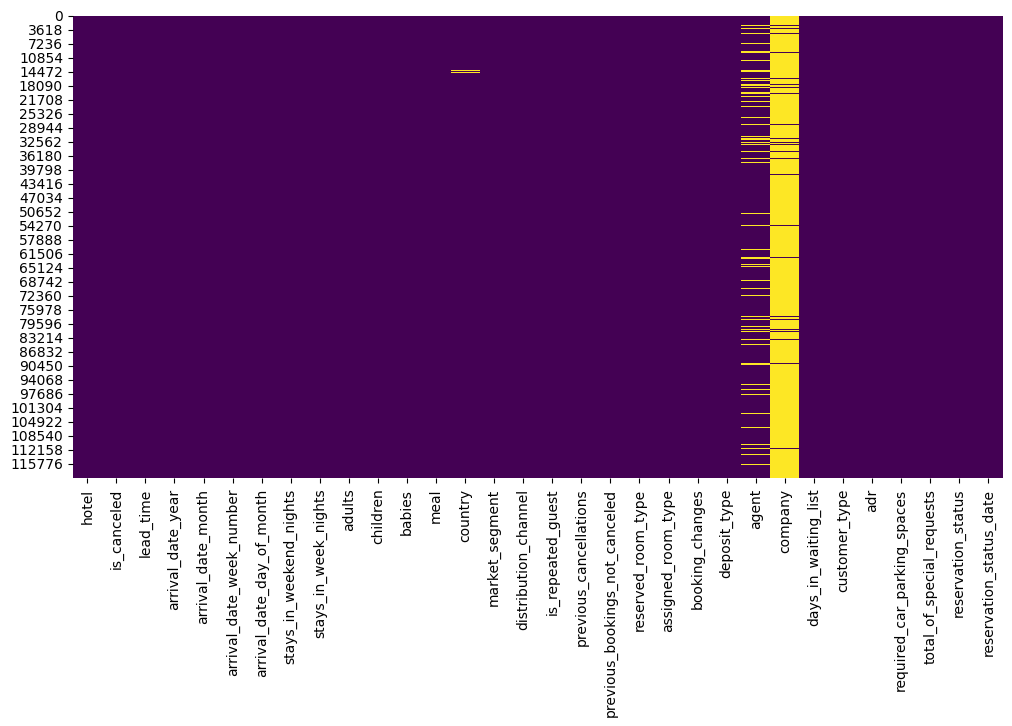

In [98]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

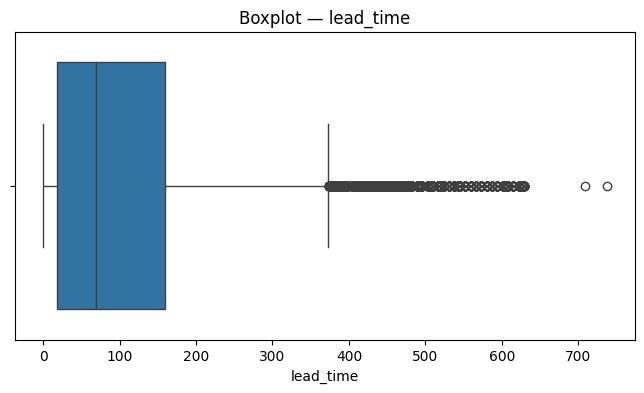

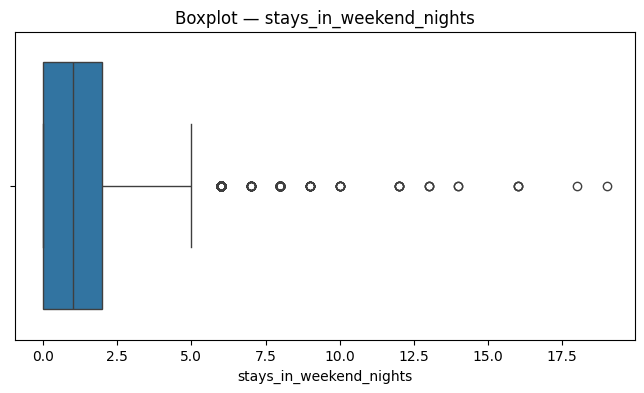

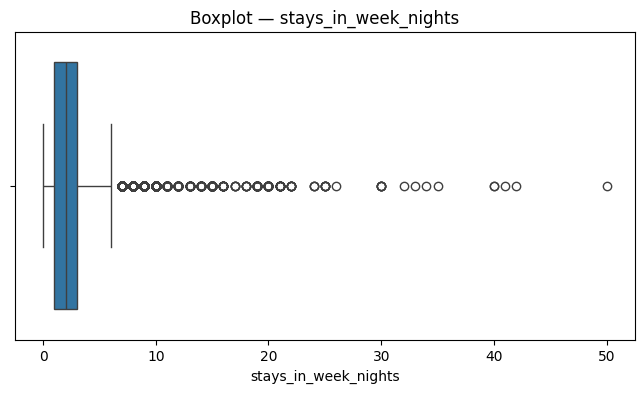

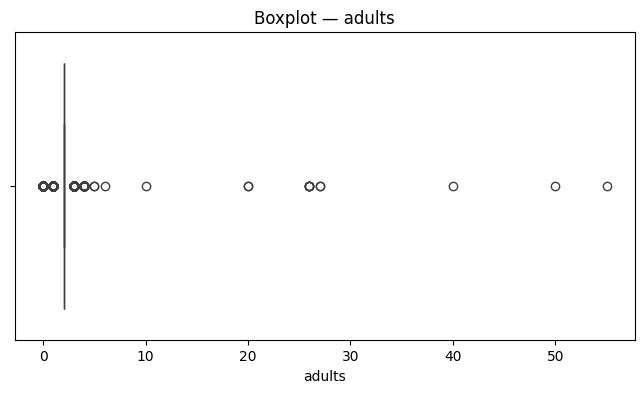

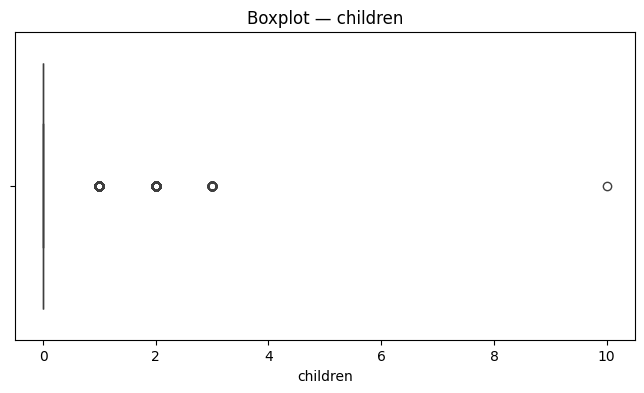

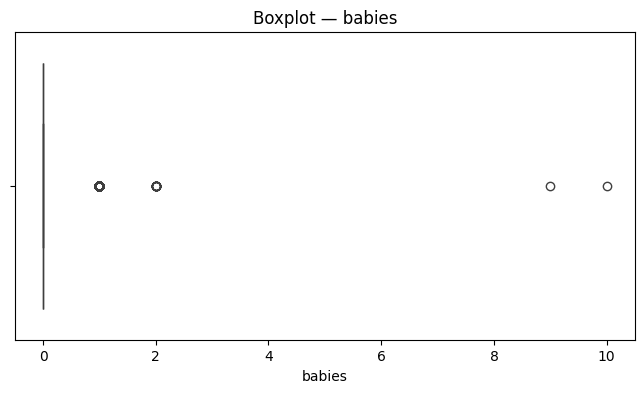

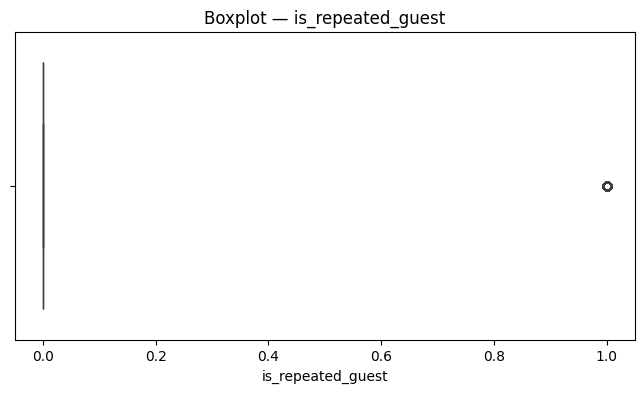

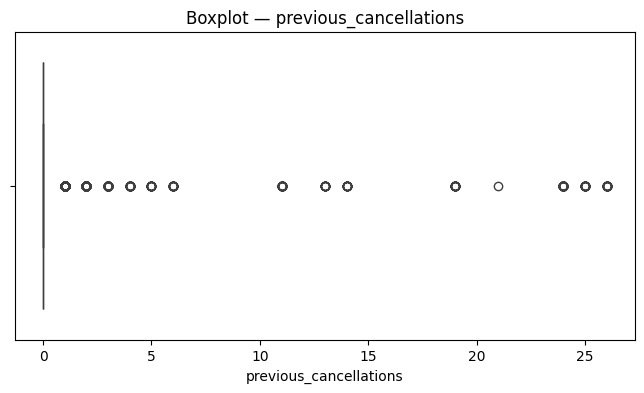

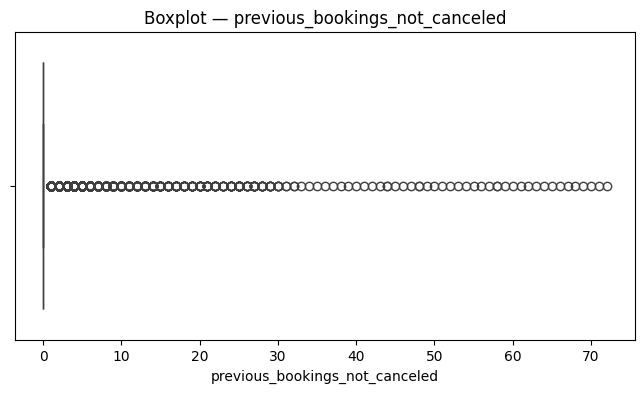

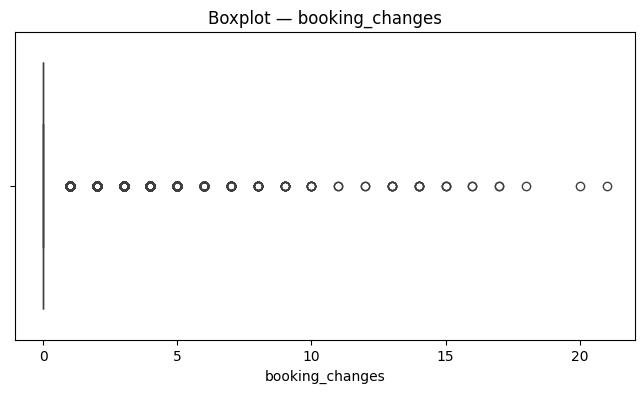

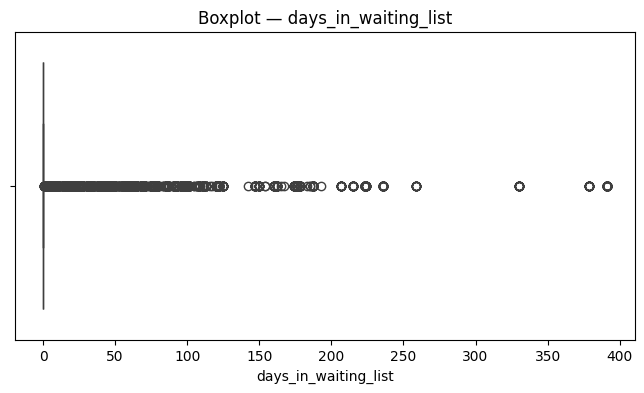

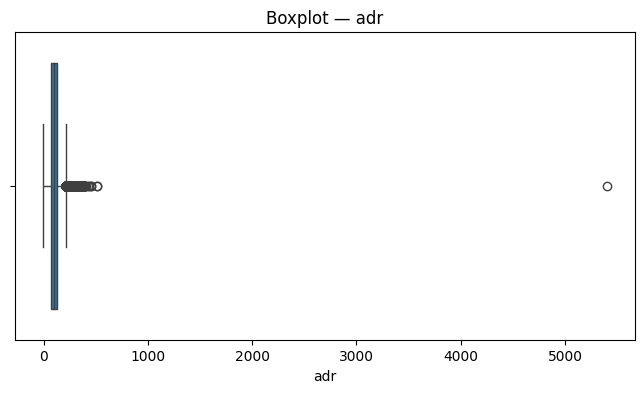

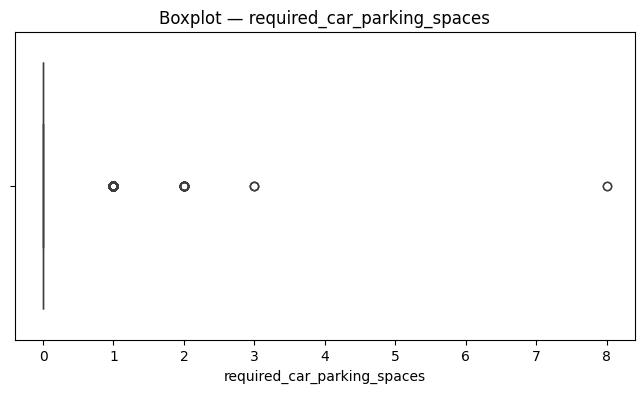

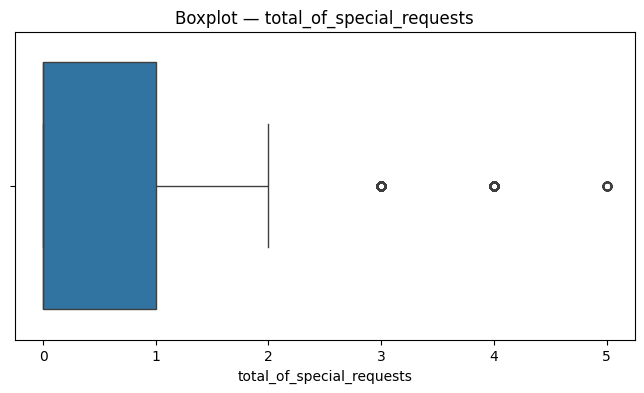

,column,lower,upper,outlier_count,pct
7,adults,2.000,2.000,29710,24.88
13,booking_changes,0.000,0.000,18076,15.14
8,children,0.000,0.000,8590,7.20
18,required_car_parking_spaces,0.000,0.000,7416,6.21
11,previous_cancellations,0.000,0.000,6484,5.43
10,is_repeated_guest,0.000,0.000,3810,3.19
17,adr,-15.775,211.065,3793,3.18
16,days_in_waiting_list,0.000,0.000,3698,3.10
12,previous_bookings_not_canceled,0.000,0.000,3620,3.03
6,stays_in_week_nights,-2.000,6.000,3354,2.81


In [99]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def iqr_outliers(series, k: float = 1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

outlier_cols = []
iqr_report = []
for col in num_cols:
    s = df[col].dropna()
    if s.empty:
        continue
    lo, hi = iqr_outliers(s)
    count_out = ((s < lo) | (s > hi)).sum()
    if count_out > 0:
        outlier_cols.append(col)
    iqr_report.append({"column": col, "lower": lo, "upper": hi, "outlier_count": int(count_out), "pct": round(count_out/len(s)*100, 2)})

for col in outlier_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot — {col}")
    plt.show()
    
iqr_report_df = pd.DataFrame(iqr_report).sort_values("pct", ascending=False)
display(iqr_report_df)


### Data Quality Findings
- **Missing data**: Find a missing data at columns `("children", "country", "agent", "company")`
- **Outliers**: Find outliers at `("adults", "booking_changes", "children", "required_car_parking_spaces", "previous_cancellations", "is_repeated_guest", "adr", "days_in_waiting_list", "previous_bookings_not_canceled", "stays_in_week_nights", "lead_time", "total_of_special_requests", "babies", "stays_in_weekend_nights")`

## Phase 2 — Data Cleaning

In [100]:
# company & agent
for col in ["company", "agent"]:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("None")

# country: impute with mode or new "Unknown"
mode_country = df["country"].mode(dropna=True)
if len(mode_country) > 0:
    df["country"] = df["country"].fillna(mode_country.iloc[0])
else:
    df["country"] = df["country"].fillna("Unknown")

# children
df["children"] = df["children"].fillna(df["children"].median())

print(df.isna().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [101]:
duplicates_df = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())

print(f"No. of duplicated rows: {len(duplicates_df)}")
duplicates_df


No. of duplicated rows: 40198


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40772,City Hotel,0,0,2015,August,32,7,0,2,2,...,No Deposit,14.0,0.0,0,Transient,75.0,0,1,Check-Out,2015-08-09
40802,City Hotel,0,0,2015,August,32,7,0,2,2,...,No Deposit,14.0,0.0,0,Transient,75.0,0,1,Check-Out,2015-08-09
40821,City Hotel,0,0,2015,August,32,8,0,1,2,...,No Deposit,9.0,0.0,0,Transient,89.0,0,1,Check-Out,2015-08-09
40838,City Hotel,0,0,2015,August,32,8,0,1,2,...,No Deposit,9.0,0.0,0,Transient,89.0,0,1,Check-Out,2015-08-09
76792,City Hotel,0,0,2015,August,33,10,1,0,2,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,Non Refund,96.0,0.0,0,Transient,47.0,0,0,Canceled,2017-05-03
11603,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,Non Refund,96.0,0.0,0,Transient,47.0,0,0,Canceled,2017-05-03
11605,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,Non Refund,96.0,0.0,0,Transient,47.0,0,0,Canceled,2017-05-03
11606,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,Non Refund,96.0,0.0,0,Transient,47.0,0,0,Canceled,2017-05-03


In [102]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows.")

Removed 32013 duplicate rows.


In [103]:
df.shape

(87377, 32)

In [104]:
outlier_cols = [
    "adults", "booking_changes", "children", "required_car_parking_spaces",
    "previous_cancellations", "is_repeated_guest", "adr", "days_in_waiting_list",
    "previous_bookings_not_canceled", "stays_in_week_nights", "lead_time",
    "total_of_special_requests", "babies", "stays_in_weekend_nights"
]

def cap_outliers(df, cols, k=1.5, adr_cap=1000):
    df = df.copy()
    for col in cols:
        
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr

        before_low = (df[col] < lower).sum()
        before_high = (df[col] > upper).sum()

        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

        print(f"'{col}': Capped {before_low} lows below {lower:.2f}, {before_high} highs above {upper:.2f}")
    
    return df

df_capped = cap_outliers(df, outlier_cols)

'adults': Capped 16876 lows below 2.00, 6011 highs above 2.00
'booking_changes': Capped 0 lows below 0.00, 15901 highs above 0.00
'children': Capped 0 lows below 0.00, 8364 highs above 0.00
'required_car_parking_spaces': Capped 0 lows below 0.00, 7313 highs above 0.00
'previous_cancellations': Capped 0 lows below 0.00, 1685 highs above 0.00
'is_repeated_guest': Capped 0 lows below 0.00, 3415 highs above 0.00
'adr': Capped 0 lows below -21.00, 2488 highs above 227.00
'days_in_waiting_list': Capped 0 lows below 0.00, 860 highs above 0.00
'previous_bookings_not_canceled': Capped 0 lows below 0.00, 3545 highs above 0.00
'stays_in_week_nights': Capped 0 lows below -3.50, 1531 highs above 8.50
'lead_time': Capped 0 lows below -160.00, 2396 highs above 296.00
'total_of_special_requests': Capped 0 lows below -1.50, 2672 highs above 2.50
'babies': Capped 0 lows below 0.00, 914 highs above 0.00
'stays_in_weekend_nights': Capped 0 lows below -3.00, 220 highs above 5.00


In [105]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], errors="coerce")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  object        
 1   is_canceled                     87377 non-null  int64         
 2   lead_time                       87377 non-null  int64         
 3   arrival_date_year               87377 non-null  int64         
 4   arrival_date_month              87377 non-null  object        
 5   arrival_date_week_number        87377 non-null  int64         
 6   arrival_date_day_of_month       87377 non-null  int64         
 7   stays_in_weekend_nights         87377 non-null  int64         
 8   stays_in_week_nights            87377 non-null  int64         
 9   adults                          87377 non-null  int64         
 10  children                        87377 non-null  float64       
 11  babies

## Phase 3 — Feature Engineering & Preprocessing

In [107]:
# New Features
df["total_guests"] = df["adults"].fillna(0) + df["children"].fillna(0) + df["babies"].fillna(0)
df["total_nights"] = df["stays_in_weekend_nights"].fillna(0) + df["stays_in_week_nights"].fillna(0)
df["is_family"] = np.where((df["children"].fillna(0) + df["babies"].fillna(0)) > 0, 1, 0)

In [108]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,2.0,2,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,2.0,2,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.0,0,1,Canceled,2015-05-06,2.0,3,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,Transient,105.5,0,0,Canceled,2015-04-22,2.0,3,0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,Transient,123.0,0,0,Canceled,2015-06-23,2.0,4,0


In [109]:
leakage_cols = ["reservation_status", "reservation_status_date"]

df = df.drop(columns=leakage_cols, errors="ignore")

print(df.shape)
df.head()

(87377, 33)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,2.0,2,0


In [110]:
cat_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()

low_cardinality = []
high_cardinality = []
CARD_THRESHOLD = 25  
for c in cat_cols:
    nuni = df[c].nunique(dropna=True)
    if nuni <= CARD_THRESHOLD:
        low_cardinality.append(c)
    else:
        high_cardinality.append(c)

low_cardinality, high_cardinality


(['hotel',
  'arrival_date_month',
  'meal',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type'],
 ['country'])

In [111]:
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

for col in high_cardinality:
    freq = df[col].value_counts(normalize=True) 
    df[col] = df[col].map(freq)

print(df.shape)
df.head()

(87377, 76)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,False,False,True,False


In [114]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["is_canceled"])   
y = df["is_canceled"]                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)


Training data: (69901, 75) (69901,)
Test data: (17476, 75) (17476,)
